In [1]:
import numpy as np
from matplotlib import pyplot as plt, animation as animation, ticker as mticker
from tqdm.notebook import tqdm

from fireworks.particles import Particles
import fireworks.ic as ic
import fireworks.nbodylib.dynamics as fnd
import fireworks.nbodylib.integrators as fni
np.random.seed(9725)

In [ ]:
position = np.array([[0,0,0],
                     [0.5,0.866,0],
                     [1,0,0]])

vel = np.array([[0,0,0],
                [0,0,0],
                [0,0,0]])

mass = np.array([3,4,5])

# Create instances of the particles
part = Particles(position, vel, mass)
Etot_0, _, _ = part.Etot()


pos_i = []
vel_i = []
acc_i = []
mass_i = []
Etot_i = []
tstep_i = []

tstart=0
N_end = 65
dt = 0.001
tintermediate=np.linspace(0+0.00001, N_end, int(N_end/dt))
tcurrent=0

pbar = tqdm(total=len(tintermediate))

for t in tintermediate:

    tstep = t-tcurrent
    if tstep<=0: continue

    part, efftime, _, _, _ = fni.integrator_tsunami(part, tstep)

    # Here we can save stuff, plot stuff, etc.
    pos_i.append(part.pos.copy())
    vel_i.append(part.vel.copy())
    mass_i.append(part.mass.copy())
    Etot_j, _, _ = part.Etot()
    Etot_i.append(Etot_j.copy())
    tstep_i.append(tstep)

    pbar.update(1)

    tcurrent += efftime


In [ ]:
# pos = np.array([[0.0,0.0,0.0],[0.5, 0.866, 0.0],[1.0, 0.0, 0.0]])
# vel = np.array([[0.0,0.0,0.0], [0.0,0.0,0.0], [0.0,0.0,0.0]])
# mass = np.array([3.0, 4.0, 5.0])
# particles = Particles(position=pos, velocity=vel, mass=mass)

# pos_list=[]
# vel_list=[]
# energy_list=[]

# tevolve=65
# tstep = 0.001
# tcurrent=0
# tintermediate = np.linspace(0, tevolve, int(tevolve/tstep))
# for t in tqdm(tintermediate):
#     tstep=t-tcurrent
#     if tstep <=0: continue # continue means go to the next step (i.e. next t in the array)
#     # particles, efftime,_,_,_= fni.integrator_hermite(particles,tstep, acceleration_estimator=fnd.acceleration_direct_vectorized, args={'return_jerk':True})
#     particles, efftime,_,_,_= fni.integrator_tsunami(particles,tstep)
    
#     # Save the particles positions and velocities and energy
#     # pos_list.append(particles.pos.copy())
#     # vel_list.append(particles.vel.copy())
#     # Etot, _, _ = particles.Etot()
#     # energy_list.append(Etot)
#     # Here we can save stuff, plot stuff, etc.
#     tcurrent=tcurrent+efftime

In [ ]:
array = np.zeros((len(pos_i), 11))
array[:, :3] = np.stack((x_1, y_1, z_1)).T
array[:, 3:6] = np.stack((x_2, y_2, z_2)).T
array[:, 6:9] = np.stack((x_3, y_3, z_3)).T
array[:,  9] = np.array(Etot_i)
array[:, 10] = np.array(tstep_i)
# np.save('./tsunami_3body.npy', array)

In [ ]:
len(Etot_i)

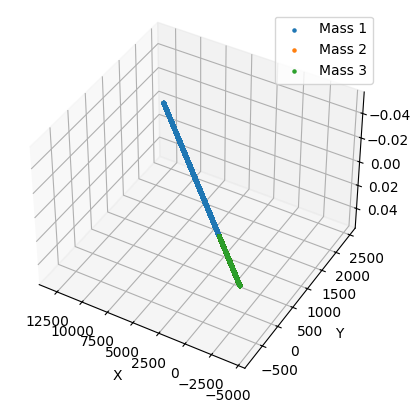

In [14]:
# pos_array = np.array(pos_i)
# x_1, y_1, z_1 = pos_array[:, 0][:, 0], pos_array[:, 0][:, 1], pos_array[:, 0][:, 2]
# x_2, y_2, z_2 = pos_array[:, 1][:, 0], pos_array[:, 1][:, 1], pos_array[:, 1][:, 2]
# x_3, y_3, z_3 = pos_array[:, 2][:, 0], pos_array[:, 2][:, 1], pos_array[:, 2][:, 2]

#read data from file
data = np.load('./tsunami_3body.npy')
x_1, y_1, z_1 = data[:, 0], data[:, 1], data[:, 2] 
x_2, y_2, z_2 = data[:, 3], data[:, 4], data[:, 5] 
x_3, y_3, z_3 = data[:, 6], data[:, 7], data[:, 8] 

fig = plt.figure()
ax = fig.add_subplot(projection='3d')


ax.scatter(x_1, y_1, z_1, s=5, label='Mass 1')
ax.scatter(x_2, y_2, z_2, s=5, label='Mass 2')
ax.scatter(x_3, y_3, z_3, s=5, label='Mass 3')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
ax.view_init(-140, 60)
plt.show()

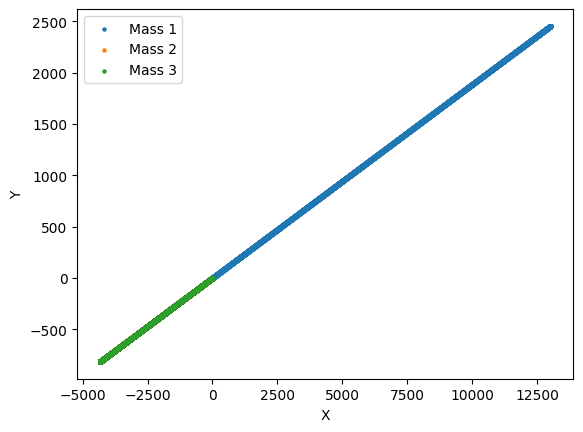

In [17]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(x_1, y_1,  s=5, label='Mass 1')
ax.scatter(x_2, y_2,  s=5, label='Mass 2')
ax.scatter(x_3, y_3,  s=5, label='Mass 3')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()